In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Construction related data collected from the Australian Bureau of Statistics
CONSTRUCTION_INPUTS = "../data/Input Prices for Constructions.xlsx"
CONSTRUCTION_OUTPUTS = "../data/Output Prices from Constructions.xlsx"
CONSTRUCTION_WORKS = "../data/Value of Construction Works.xlsx"

## Key variables for illiquid stock analysis
FRED = "FEDFUNDS"
ILLIQUID_TICKER = "KELYB"
LIQUID_INDEX_TICKER = "SPY"

In [3]:
## CODE from M1 Lesson 1 of FD

def get_fred_data(param_list, start_date, end_date) -> pd.DataFrame:
    df = pdr.DataReader(param_list, "fred", start_date, end_date) 
    return df.reset_index()

In [4]:
c_inputs = pd.read_excel(CONSTRUCTION_INPUTS, sheet_name='Data1')
c_outputs = pd.read_excel(CONSTRUCTION_OUTPUTS, sheet_name='Data1')
c_works = pd.read_excel(CONSTRUCTION_WORKS, sheet_name='Data1')

## Data Analysis for Construction Loan

In [5]:
# TODO: First, list down key columns from each data set in this cell. 
# TODO: Second, write in  markdown, what these columns do, what do they tell us, what time period are we taking and why
# TODO: Third, clean up data set in accordance to what we need. 
# TODO: Fourth, run analysis

## Data Extraction and Analysis for Illquid Stock

In [6]:
PERIOD_START = "2017-01-01"
PERIOD_END = "2024-01-01"

In [7]:
def extract_and_process_stocks() -> pd.DataFrame:

    stock = yf.Ticker(ILLIQUID_TICKER)
    stock_df = stock.history(start=PERIOD_START, end=PERIOD_END).reset_index()
    stock_df['Date'] = stock_df['Date'].dt.tz_localize(None)

    index = yf.Ticker(LIQUID_INDEX_TICKER)
    index_df = index.history(start=PERIOD_START, end=PERIOD_END).reset_index()
    index_df['Date'] = index_df['Date'].dt.tz_localize(None)
    index_df.head()

    fed_rate = get_fred_data(param_list=[FRED], start_date=PERIOD_START, end_date=PERIOD_END)
    fed_rate_df = pd.DataFrame(columns=['Date'])
    fed_rate_df['Date'] = pd.date_range(PERIOD_START, PERIOD_END, freq='D')
    fed_rate_df = pd.merge(fed_rate_df, fed_rate, how='left', left_on='Date', right_on='DATE').drop(columns=['DATE']).ffill()

    return pd.merge(pd.merge(stock_df, index_df, how='inner', on='Date', suffixes=[f"_{ILLIQUID_TICKER}", f"_{LIQUID_INDEX_TICKER}"]), fed_rate_df, on="Date")

In [8]:
final_df = extract_and_process_stocks()
final_df.tail(10)

,Date,Open_KELYB,High_KELYB,Low_KELYB,Close_KELYB,Volume_KELYB,Dividends_KELYB,Stock Splits_KELYB,Open_SPY,High_SPY,Low_SPY,Close_SPY,Volume_SPY,Dividends_SPY,Stock Splits_SPY,Capital Gains,FEDFUNDS
1750,2023-12-15,20.90,20.90,20.90,20.90,100,0.0,0.0,469.489990,470.700012,467.429993,469.329987,141319300,1.906,0.0,0.0,5.33
1751,2023-12-18,20.90,20.90,20.90,20.90,0,0.0,0.0,470.980011,472.980011,469.890015,471.970001,70375300,0.000,0.0,0.0,5.33
1752,2023-12-19,20.90,20.90,20.90,20.90,0,0.0,0.0,472.529999,474.920013,472.450012,474.839996,55761800,0.000,0.0,0.0,5.33
1753,2023-12-20,20.90,20.90,20.90,20.90,0,0.0,0.0,473.959991,475.899994,467.820007,468.260010,102921000,0.000,0.0,0.0,5.33
1754,2023-12-21,21.15,21.15,21.15,21.15,100,0.0,0.0,471.329987,472.980011,468.839996,472.700012,86667500,0.000,0.0,0.0,5.33
1755,2023-12-22,21.65,21.65,21.65,21.65,200,0.0,0.0,473.859985,475.380005,471.700012,473.649994,67126600,0.000,0.0,0.0,5.33
1756,2023-12-26,21.65,21.65,21.65,21.65,0,0.0,0.0,474.070007,476.579987,473.989990,475.649994,55387000,0.000,0.0,0.0,5.33
1757,2023-12-27,21.65,21.65,21.65,21.65,0,0.0,0.0,475.440002,476.660004,474.890015,476.510010,68000300,0.000,0.0,0.0,5.33
1758,2023-12-28,21.65,21.65,21.65,21.65,0,0.0,0.0,476.880005,477.549988,476.260010,476.690002,77158100,0.000,0.0,0.0,5.33
1759,2023-12-29,21.65,21.65,21.65,21.65,0,0.0,0.0,476.489990,477.029999,473.299988,475.309998,122234100,0.000,0.0,0.0,5.33


### Analysis of the Volumes

Text(0.5, 0.98, 'Volume Time Series')

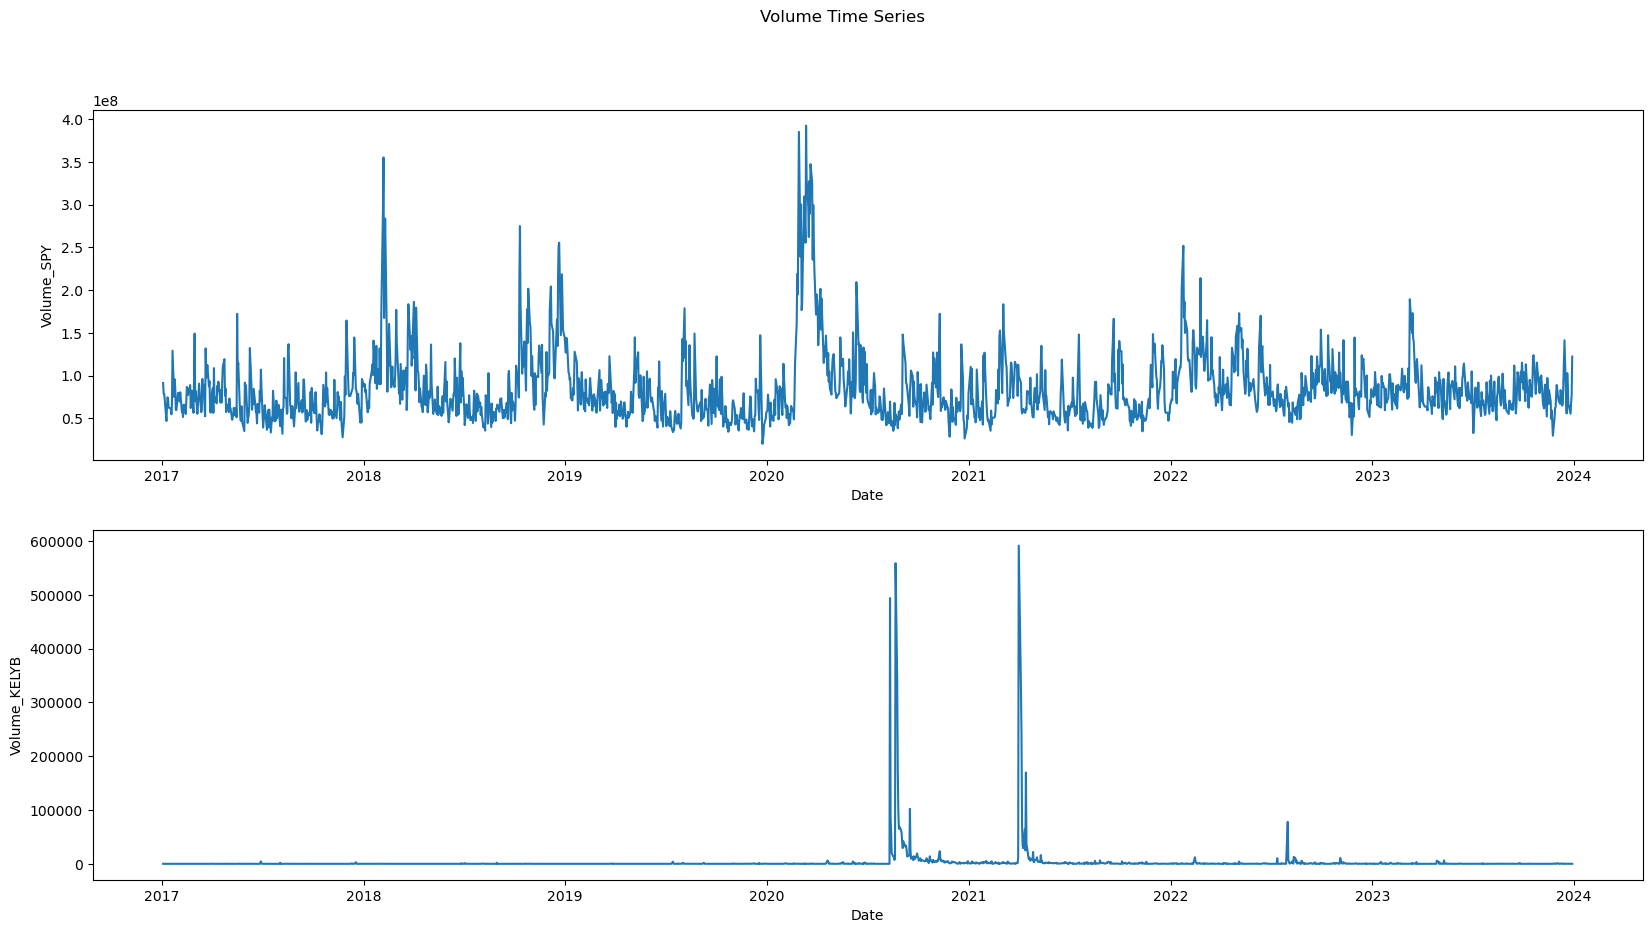

In [9]:
## Showing the illiquidity of KELYB
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
sns.lineplot(x='Date', y=f'Volume_{LIQUID_INDEX_TICKER}', data=final_df, ax=ax[0])
sns.lineplot(x='Date', y=f'Volume_{ILLIQUID_TICKER}', data=final_df, ax=ax[1])
fig.suptitle('Volume Time Series')

Text(0.5, 0.98, 'Volume Distribution')

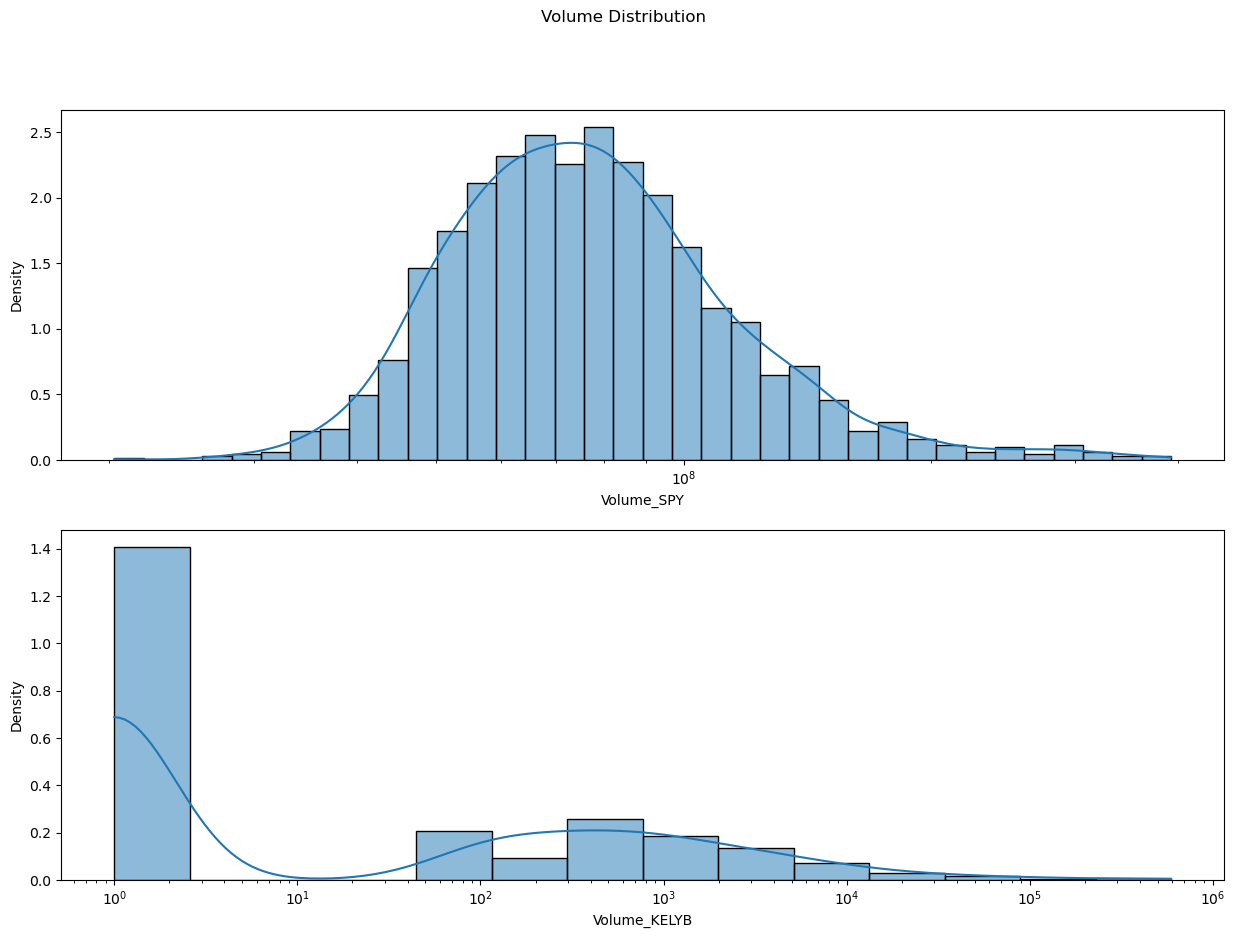

In [10]:
## Showing the illiquidity of KELYB
## Note that plots are in log-scale
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.histplot(data=final_df[f'Volume_{ILLIQUID_TICKER}'] + 1, log_scale=True, kde=True, stat='density', ax=ax[1])
sns.histplot(data=final_df[f'Volume_{LIQUID_INDEX_TICKER}'] + 1, log_scale=True, kde=True, stat='density', ax=ax[0])
fig.suptitle('Volume Distribution')

Text(0.5, 1.0, 'Kendall Correlation between Volume and Fed Rates')

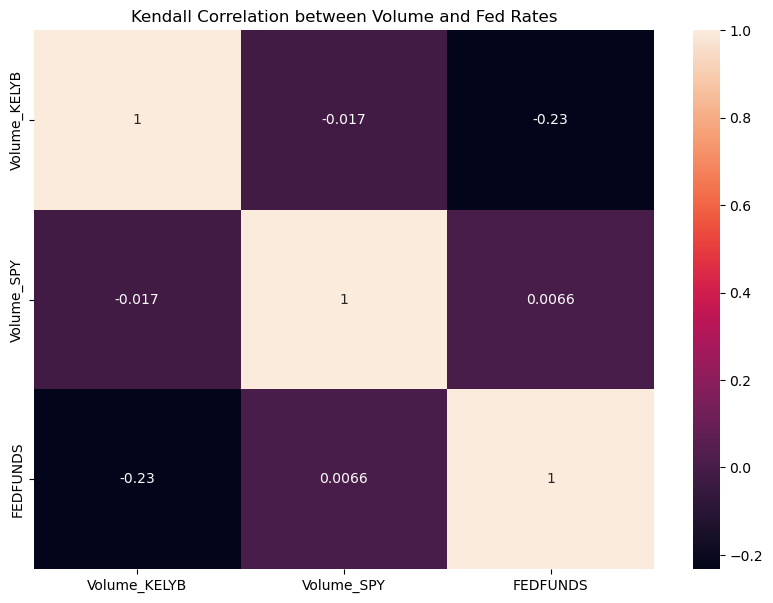

In [22]:
# FEDFUNDS and volume of KELYB has a negative correlation
plt.figure(figsize=(10,7))
vol_fed_df = final_df[[f'Volume_{ILLIQUID_TICKER}', f'Volume_{LIQUID_INDEX_TICKER}', 'FEDFUNDS']]
sns.heatmap(vol_fed_df[[f'Volume_{ILLIQUID_TICKER}', f'Volume_{LIQUID_INDEX_TICKER}', 'FEDFUNDS']].corr('kendall'), annot=True)

plt.title('Kendall Correlation between Volume and Fed Rates')

### Analysis on Returns